<a href="https://colab.research.google.com/github/ralsouza/apache_spark_real_time_analytics/blob/master/notebooks/04_spark_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Setup

In [1]:
!apt-get update

Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [43.0 kB]
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubu

In [2]:
# Install the dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [3]:
# Environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
 
# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [4]:
# Libraries and Context Setup
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark import SparkContext, SparkConf

# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)

# Instance Spark Session
spark = SparkSession.builder.master('local').appName('My-SparkSQL').getOrCreate()

# Create the SQL Context
sqlContext = pyspark.SQLContext(sc)

In [5]:
# Check context
print(sc)

<SparkContext master=local[*] appName=pyspark-shell>


In [ ]:
#  sc.stop()

# Spark SQL - Spark Session and SQL Context

In [ ]:
# Load cars dataset
rows_rdd1 = sc.textFile('/content/drive/My Drive/Colab Notebooks/08-apache-spark/data/carros.csv')

In [ ]:
# Count rows
rows_rdd1.count()

198

In [ ]:
# Remove the first row - Lazy Transformation 1
rows_rdd2 = rows_rdd1.filter(lambda x: 'FUELTYPE' not in x)

In [ ]:
# One row removed
rows_rdd2.count()

197

In [ ]:
# Spliting the dataset in columns - Lazy Transformation 2
rows_rdd3 = rows_rdd2.map(lambda line:line.split(','))

In [ ]:
# Spliting the dataset in columns - Lazy Transformation 3
rows_rdd4 = rows_rdd3.map(lambda p: Row(make=p[0],body=p[4],hp=int(p[7])))

In [ ]:
print(rows_rdd4)

PythonRDD[4] at RDD at PythonRDD.scala:53


In [ ]:
# Collect action
rows_rdd4.collect()

[Row(body='hatchback', hp=69, make='subaru'),
 Row(body='hatchback', hp=48, make='chevrolet'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=60, make='honda'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=68, make='mazda'),
 Row(body='hatchback', hp=68, make='mitsubishi'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=68, make='plymouth'),
 Row(body='hatchback', hp=70, make='chevrolet'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=68, make='dodge'),
 Row(body='hatchback', hp=58, make='honda'),
 Row(body='hatchback', hp=62, make='toyota'),
 Row(body='hatchback', hp=76, make='honda'),
 Row(body='sedan', hp=70, make='chevrolet'),
 Row(body='sedan', hp=69, make='nissan'),
 Row(body='hatchback', hp=68, mak

In [ ]:
# Create a dataframe from a RDD
df_rows = spark.createDataFrame(rows_rdd4)

In [ ]:
# Show dataframe
df_rows.show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [ ]:
# Check type
type(df_rows)

pyspark.sql.dataframe.DataFrame

## Using SQL commands with Spark

In [ ]:
# Selecting all rows
df_rows.select('*').show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [ ]:
# Select all rows sorting by make
df_rows.orderBy('make').show()

+-----------+---+-----------+
|       body| hp|       make|
+-----------+---+-----------+
|  hatchback|154|alfa-romero|
|convertible|111|alfa-romero|
|convertible|111|alfa-romero|
|      sedan|110|       audi|
|      sedan|115|       audi|
|      sedan|110|       audi|
|      wagon|110|       audi|
|      sedan|140|       audi|
|      sedan|102|       audi|
|      sedan|101|        bmw|
|      sedan|101|        bmw|
|      sedan|121|        bmw|
|      sedan|121|        bmw|
|      sedan|182|        bmw|
|      sedan|182|        bmw|
|      sedan|121|        bmw|
|      sedan|182|        bmw|
|      sedan| 70|  chevrolet|
|  hatchback| 70|  chevrolet|
|  hatchback| 48|  chevrolet|
+-----------+---+-----------+
only showing top 20 rows



In [ ]:
# Create a in-memory temporary table to use ANSI SQL
df_rows.createOrReplaceTempView('tbl_rows')

In [ ]:
# Executing a ANSI SQL
spark.sql("select * from tbl_rows where make = 'nissan'").show()

+---------+---+------+
|     body| hp|  make|
+---------+---+------+
|    sedan| 69|nissan|
|    sedan| 69|nissan|
|    sedan| 69|nissan|
|    sedan| 55|nissan|
|    sedan| 69|nissan|
|    wagon| 69|nissan|
|    sedan| 69|nissan|
|hatchback| 69|nissan|
|    wagon| 69|nissan|
|  hardtop| 69|nissan|
|hatchback| 97|nissan|
|    sedan| 97|nissan|
|    sedan|152|nissan|
|    sedan|152|nissan|
|    wagon|152|nissan|
|hatchback|160|nissan|
|hatchback|160|nissan|
|hatchback|200|nissan|
+---------+---+------+



In [ ]:
# Selecting data with calcs
spark.sql('select make,body,avg(hp) from tbl_rows group by make,body').show()

+-------------+-----------+-----------------+
|         make|       body|          avg(hp)|
+-------------+-----------+-----------------+
|       nissan|      wagon|96.66666666666667|
|       subaru|      sedan|             90.2|
|     plymouth|      sedan|             68.0|
|        dodge|  hatchback|             90.2|
|       nissan|      sedan|             89.0|
|        honda|      sedan|             89.8|
|   mitsubishi|  hatchback|            105.0|
|        mazda|      sedan|82.66666666666667|
|  alfa-romero|convertible|            111.0|
|mercedes-benz|convertible|            155.0|
|     plymouth|      wagon|             88.0|
|mercedes-benz|      wagon|            123.0|
|        isuzu|  hatchback|             90.0|
|       toyota|convertible|            116.0|
|        mazda|  hatchback|             89.4|
|    chevrolet|      sedan|             70.0|
|      mercury|  hatchback|            175.0|
|      porsche|  hatchback|            143.0|
|        honda|      wagon|       

## Spark SQL and CSV files

In [ ]:
df_cars = spark.read.csv('/content/drive/My Drive/Colab Notebooks/08-apache-spark/data/carros.csv',header=True)

In [ ]:
type(df_cars)

pyspark.sql.dataframe.DataFrame

In [ ]:
df_cars.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [ ]:
# Exporting the the dataframe to a temp table in-memory
df_cars.createOrReplaceTempView('tbl_cars')

In [ ]:
# Executing a SQL instruction
spark.sql("select make,hp,price from tbl_cars where CYLINDERS = 'three'").show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [ ]:
# storing in an object
cars_tt = spark.sql("select make,hp,price from tbl_cars where CYLINDERS = 'three'")

In [ ]:
cars_tt.show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



# Applying Machine Learning

In [6]:
# Loading data from csv
cars = sc.textFile('/content/drive/My Drive/Colab Notebooks/08-apache-spark/data/carros.csv')

# Put data into cache
cars.cache()

/content/drive/My Drive/Colab Notebooks/08-apache-spark/data/carros.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [7]:
# Remove the data's header
header = cars.first()

# Select all rows except the header
rows = cars.filter(lambda x:x != header)

# Count selected rows
rows.count()

197

In [8]:
# Import Row function again
from pyspark.sql import Row

In [9]:
# Convert to a vector with rows
def transform_to_numeric(input_str):
  att_list = input_str.split(',')
  doors = 1.0 if att_list[3] == 'two' else 2.0
  body = 1.0 if att_list[4] == 'sedan' else 2.0

  # Filtering non-necessary columns in this step, giving a data structure to rdd
  values = Row(DOORS = doors, BODY = float(body), HP = float(att_list[7]),
               RMP=float(att_list[8]),MPG=float(att_list[9]))

  return values

In [10]:
# Applying the function and persisting in the memory
auto_map = rows.map(transform_to_numeric)
auto_map.persist()
auto_map.collect()

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=31.0, RMP=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=47.0, RMP=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=30.0, RMP=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=35.0, RMP=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=60.0, MPG=38.0, RMP=5500.0),
 Row(BODY=1.0, DOORS=1.0, HP=69.0, MPG=31.0, RMP=5200.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=37.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RMP=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=31.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=70.0, MPG=38.0, RMP=5400.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=31.0, RMP=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=31.0, RMP=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=58.0, MPG=49.0, RMP=4800.0),
 Row(BODY=2.0,

In [11]:
# Making a dataframe from rdd
cars_df = spark.createDataFrame(auto_map)
cars_df.show()

+----+-----+----+----+------+
|BODY|DOORS|  HP| MPG|   RMP|
+----+-----+----+----+------+
| 2.0|  1.0|69.0|31.0|4900.0|
| 2.0|  1.0|48.0|47.0|5100.0|
| 2.0|  1.0|68.0|30.0|5000.0|
| 2.0|  1.0|62.0|35.0|4800.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|60.0|38.0|5500.0|
| 1.0|  1.0|69.0|31.0|5200.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|37.0|5500.0|
| 2.0|  1.0|68.0|31.0|5000.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  2.0|68.0|31.0|5500.0|
| 2.0|  1.0|70.0|38.0|5400.0|
| 2.0|  1.0|62.0|31.0|4800.0|
| 2.0|  1.0|68.0|31.0|5500.0|
| 2.0|  1.0|58.0|49.0|4800.0|
| 2.0|  2.0|62.0|31.0|4800.0|
| 2.0|  1.0|76.0|30.0|6000.0|
| 1.0|  2.0|70.0|38.0|5400.0|
+----+-----+----+----+------+
only showing top 20 rows



In [12]:
# Summarizing the statistics and converting to Pandas dataframe
summ_stats = cars_df.describe().toPandas()
summ_stats

,summary,BODY,DOORS,HP,MPG,RMP
0,count,197,197,197,197,197
1,mean,1.532994923857868,1.5685279187817258,103.60406091370558,25.15228426395939,5118.0203045685275
2,stddev,0.5001812579359883,0.49654352778167493,37.639205349518356,6.437862917085915,481.03591405011446
3,min,1.0,1.0,48.0,13.0,4150.0
4,max,2.0,2.0,262.0,49.0,6600.0


In [13]:
# Extracting the means
means = summ_stats.iloc[1,1:5].values.tolist()
means

['1.532994923857868',
 '1.5685279187817258',
 '103.60406091370558',
 '25.15228426395939']

In [14]:
# Extract the standard deviations
std_dev = summ_stats.iloc[2,1:5].values.tolist()
std_dev

['0.5001812579359883',
 '0.49654352778167493',
 '37.639205349518356',
 '6.437862917085915']

In [15]:
# Inserting the means and standard deviations into a broadcast variable type
bc_means = sc.broadcast(means)
bc_std_dev = sc.broadcast(std_dev)

In [16]:
# Import Vetors function
from pyspark.ml.linalg import Vectors

In [17]:
# Function to normalize the data and make a dense vector
# Putting the data in the same scale
def center_and_scale(in_row):
  global bc_means
  global bc_std_dev

  mean_array = bc_means.value
  std_array  = bc_std_dev.value

  ret_array = []
  
  # n = value of index
  # (n - mean[n]) / Std.Deviation[n]
  for i in range(len(mean_array)):
    ret_array.append( (float(in_row[i]) - float(mean_array[i])) / float(std_array[i]) )

  return Vectors.dense(ret_array)

In [18]:
# Transforming the dataframe in rdd temporarily to make the calculation 
cs_auto = cars_df.rdd.map(center_and_scale)

# Show normalized data, now the data is in the same scale
cs_auto.collect()

[DenseVector([0.9337, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -1.4773, 3.3936]),
 DenseVector([0.9337, -1.145, -0.9459, 0.753]),
 DenseVector([0.9337, -1.145, -1.1053, 1.5297]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -1.1585, 1.9956]),
 DenseVector([-1.0656, -1.145, -0.9194, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 1.8403]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, 0.869, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -0.8928, 1.9956]),
 DenseVector([0.9337, -1.145, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.9459, 0.9083]),
 DenseVector([0.9337, -1.145, -1.2116, 3.7043]),
 DenseVector([0.9337, 0.869, -1.1053, 0.9083]),
 DenseVector([0.9337, -1.145, -0.7334, 0.753]),
 DenseVector([-1.0656, 0.869, -0.8928, 1.9956]),
 DenseVector([-1.0656, -

In [21]:
auto_rows = cs_auto.map(lambda f: Row(features = f))
auto_df = spark.createDataFrame(auto_rows)
auto_df.select('features').show(10)

+--------------------+
|            features|
+--------------------+
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
|[-1.0656035495158...|
|[0.93367168148051...|
|[0.93367168148051...|
|[0.93367168148051...|
+--------------------+
only showing top 10 rows



In [29]:
# Apply K-Means
from pyspark.ml.clustering import KMeans

# Define model with 3 clusters
kmeans = KMeans(k=3,seed=1)

# Present the data to algorithm and make model
model = kmeans.fit(auto_df)

# Make predictions
predict = model.transform(auto_df)

predict.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[0.93367168148051...|         1|
|[-1.0656035495158...|         0|
+--------------------+----------+
only showing top 20 rows



In [30]:
# Plot results
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [32]:
# Function to desnormalize data to visualization
def unstrip_data(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])

In [33]:
# Organize data in a plot
unstripped = predict.rdd.map(unstrip_data)
pred_list = unstripped.collect()
pred_pd = pd.DataFrame(pred_list)

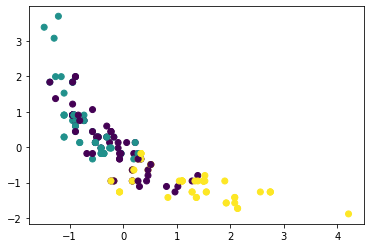

In [35]:
plt.cla()
plt.scatter(pred_pd[3], pred_pd[4], c = pred_pd[0])
plt.show()

# Monitor Jobs - Spark UI

In [ ]:
spark

In [ ]:
# If you are running this Colab on the Google hosted runtime, the cell below 
# will create a ngrok tunnel which will allow you to still check the Spark UI.
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-08-19 10:30:30--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.159.87.23, 52.54.251.217, 34.233.175.36, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.159.87.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  60.9MB/s    in 0.2s    

2020-08-19 10:30:31 (60.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://3f28f3706035.ngrok.io
